# Función en R para simular una cadena de Markov

In [1]:
rMarkov <- function(P, n = 100, mu0 = rep(1, nrow(P))/nrow(P)) {
# P: matriz de transici´on (sin valor por defecto)
# n: n´umero de simulaciones (100 por defecto)
# mu0: distribuci´on inicial (uniforme en el espacio de estados por defecto)
# si el espacio de estados est´a en los nombres de las columnas de P, usarlo
if(length(colnames(P)) == 0) estados <- 1:ncol(P) else estados <- colnames(P)
# funci´on de iniciaci´on:
func.inic <- cumsum(mu0)
# funciones de actualizaci´on:
func.act <- t(apply(P, 1, cumsum))
U <- runif(n) # uniformes U1,...,Un en [0,1]
X <- numeric(n)*NA # vector de valores simulados de la cadena, a completar
# primer valor de la cadena
j = 1; while(U[1] > func.inic[j]) j = j + 1;
X[1] <- estados[j]
# restantes valores de la cadena
for (i in 2:n) {
j = 1; while(U[i] > func.act[X[i - 1], j]) j = j + 1;
X[i] <- estados[j]
}
X
}

## Una pequeña simulacion con la funcion declarada arriba.
Si consideramos un espacio de estaos E={A,C,G,T} (A=adenina,C=citosina,G=guanina,T=timina)

In [7]:
#sea la matriz de transición entre estados P
vector=c(.2,.25,.4,0.15,.1,.6,.1,.2,.2,.1,.35,.35,.1,.45,.2,.25)
P=matrix(vector,4,4,T)
P

0.2,0.25,0.40,0.15
0.1,0.60,0.10,0.20
0.2,0.10,0.35,0.35
0.1,0.45,0.20,0.25


In [8]:
X=rMarkov(P,1000)
X[1:100]

[1] 3 1 3 3 3 4 3 2 1 3 4 2 2 4 2 4 1 2 1 1 3 4 2 4 1 3 3 2 2 4 2 3 1 2 3 4 3
 [38] 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 1 2 2 3 3 1 2 2 4 2 4 4 2 4 3 4 3 4 1 1 2 2
 [75] 2 1 3 4 4 4 1 3 3 4 3 4 3 1 3 1 2 2 4 3 1 2 2 4 4 1

### Un pequeño grafico de la simulacion de cadenas de Markov

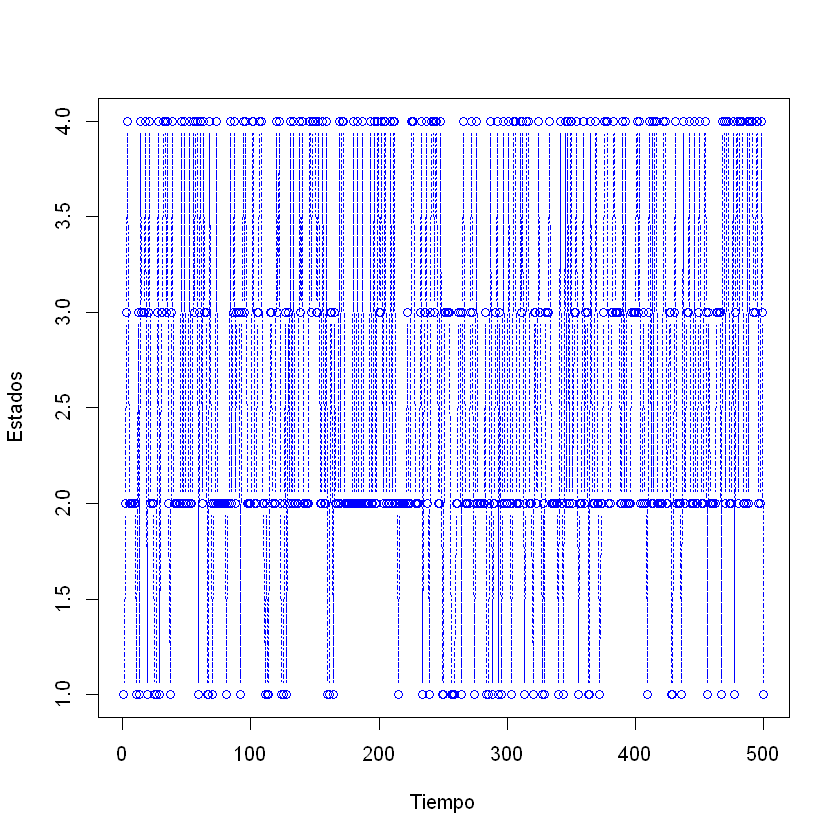

In [4]:
plot(1:500, X[1:500],type= 'b',col = 'blue',lwd = 1,las =.2, ylab= 'Estados',xlab='Tiempo',lty=10)


In [9]:
X[X==1]='A'
X[X==2]='C'
X[X==3]='G'
X[X==4]='T'
as.factor(X)

[1] G A G G G T G C A G T C C T C T A C A A G T C T A G G C C T C G A C G T G
  [38] T C C C C C C C T C C C C C C A C C G G A C C T C T T C T G T G T A A C C
  [75] C A G T T T A G G T G T G A G A C C T G A C C T T A A G T C C C T T G G T
 [112] G T C T A C C C C C C C C C C C A G G T T C C C C A A G T T T A G A A C T
 [149] T C G G G G C C C C C C C C T T G T T C T C C G G C C T T T A G T C C C C
 [186] C T C G A T C C T G C C G T C C T C C G G A G T A A C T C C C C C T T C A
 [223] G A G T C C C T C A T C C C T C T C A G G C C C G T C T C C C C C C C C C
 [260] C T G T C C C C C A C G T A C C T A G A G A A T T C G G G C C C C G G T C
 [297] C C C C G T C T T A T A G T T C C C T C C A T T G T C T C T A G T G A A A
 [334] A T G G T T C C C A C T C G A T C C C C A C T A C C G C C C C C C C G T G
 [371] G G A C A G G A G T G A T T C C C C C C G A G T G T G G G G G G G T G G G
 [408] G T A A G T G G G A A A T C C C A G G T C C G T G G A A A G G T T G T C C
 [445] G T T T G G T C C C C T C C T C A G G T C C C C C A T G T C C C T C T C C
 [482] T C C C G G T T T C C T G T G C C C C C C G T C T T T T A G C C T A G C C
 [519] C A G T C C A G T T T T A A G T T G G T C C T C C G T C C C C G G G T C C
 [556] C C C C C C C C T G A G G G G C T G G T C C G T C C G T T C A G C T C G G
 [593] G T C C C C C T G G G G G G G G G G G G G T C A G G T A T C C T C C C C C
 [630] G T G G G A G G C A A G C C C G G T C C T G T A G G G G C C G C C C G T G
 [667] A G A G T A A G T T C T G G G T C C C T A C T C C A T C C C A C C G A G T
 [704] C T G T T C T G C C C C C T G G C G G G T A G C C C G C C T C T C C A C C
 [741] C C C T C C C C T T T A G A G C C G C G C C C C G G T C T C A A C G G C G
 [778] T T A A A C C A G T G A T T A G T G T G T G A G G G C C C C T G G C C C T
 [815] T T G T T C C C C T G T C C T C A G T C C C C A C C C C C C C C A T G T C
 [852] T C C A G G G A T T C G T G G A A C C T G T T A A A A G A C A C A G T C C
 [889] T C A C A G G G T A C G G C G C C C C C C C A T C T C G A A A G G A G C T
 [926] G A A T C C C T A C C C T C T C C T C C C T G T C C C C C C T T T G T C T
 [963] C C T C C C C C T C C C T T G G T A C C C C C T T T C C C C C C C A G G T
[1000] G
Levels: A C G T

## Frecuencia relativa de visitas a cada estado

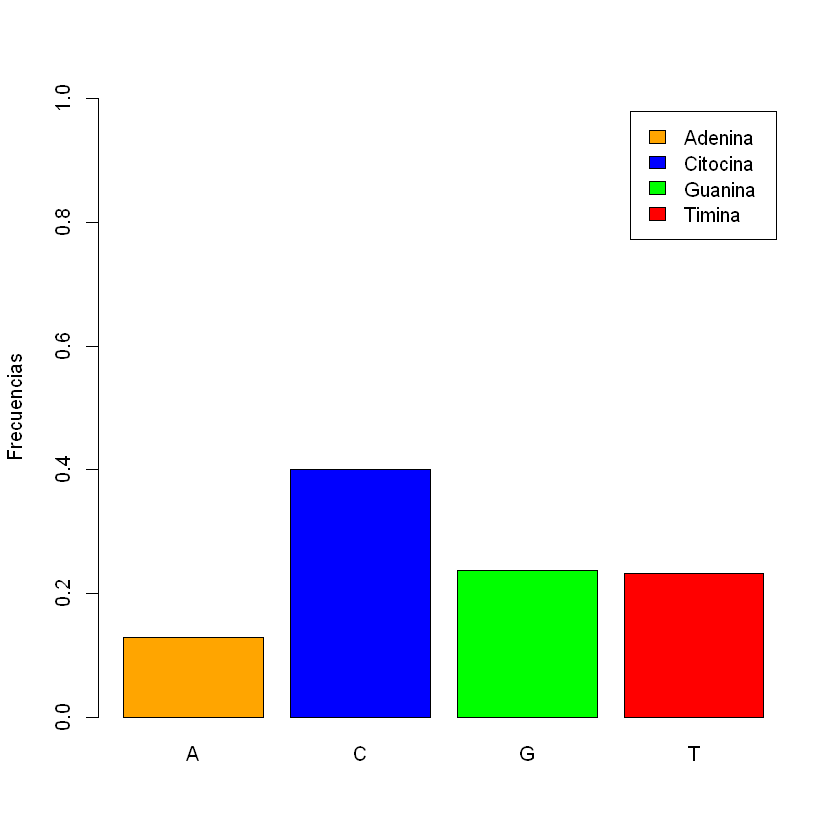

In [10]:
barplot(table(X)/1000,col=c("orange","blue","green","red"),ylim=c(0,1),ylab = "Frecuencias",
        legend.text = c("Adenina","Citocina","Guanina","Timina"))